In [6]:
%load_ext chat_magic

The chat_magic extension is already loaded. To reload it, use:
  %reload_ext chat_magic


In [ ]:
%%chat_magic 
Given is the single channel tiff files `PH1_Mg.tiff`
(this magnesium map) and `PH1_Fe.tiff` (Iron map).
Calculate the proportion of Iron and Magnesium per pixel
and visulize it.


/tmp/ipykernel_152003/1059313217.py:14: RuntimeWarning: invalid value encountered in divide
  proportion = arr_fe / (arr_fe + arr_mg)


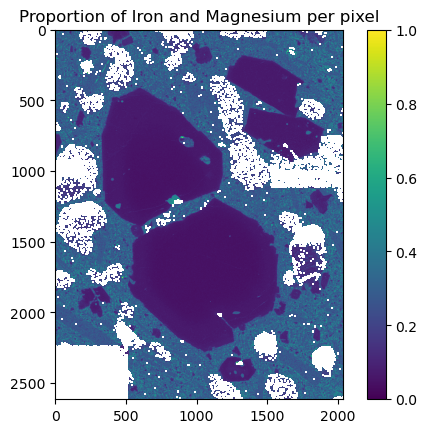

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the tiff files
img_mg = Image.open('PH1_Mg.tiff')
img_fe = Image.open('PH1_Fe.tiff')

# Convert to numpy arrays
arr_mg = np.array(img_mg)
arr_fe = np.array(img_fe)

# Calculate the proportion of Iron and Magnesium per pixel
proportion = arr_fe / (arr_fe + arr_mg)

# Visualize the result
plt.imshow(proportion, cmap='viridis')
plt.colorbar()
plt.title('Proportion of Iron and Magnesium per pixel')
plt.show()


In [5]:

import tifffile
import numpy as np
import matplotlib.pyplot as plt

# Read the TIFF files
magnesium_map = tifffile.imread('PH1_Mg.tiff')
iron_map = tifffile.imread('PH1_Fe.tiff')

# Ensure both maps have the same shape
assert magnesium_map.shape == iron_map.shape, 'Maps have different shapes'

# Calculate the proportion of Iron and Magnesium per pixel
proportions = np.zeros_like(magnesium_map)
proportions[:, :, 0] = iron_map / (iron_map + magnesium_map)  # Proportion of Iron
proportions[:, :, 1] = magnesium_map / (iron_map + magnesium_map)  # Proportion of Magnesium

# Visualize the result
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Display the original Magnesium map for reference
ax[0].imshow(magnesium_map, cmap='gray')
ax[0].set_title('Magnesium Map')

# Display the Iron proportion map
ax[1].imshow(proportions[:, :, 0], cmap='viridis')
ax[1].set_title('Iron Proportion')

# Display the Magnesium proportion map
ax[2].imshow(proportions[:, :, 1], cmap='viridis')
ax[2].set_title('Magnesium')

/tmp/ipykernel_152003/685371330.py:14: RuntimeWarning: invalid value encountered in divide
  proportions[:, :, 0] = iron_map / (iron_map + magnesium_map)  # Proportion of Iron


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed